In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import math
import matplotlib
import matplotlib.pyplot as plt

#Librerie da utilizzare plotly e geopandas

10 ottobre 2020 la turchia si impenna e fumano

In [5]:
#Fetch DataFrame from github csv
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(URL)

In [6]:
#Just a test on sum
df1 = df.loc[(df['Province/State'].notna()) & (df['Country/Region'] == 'Australia')][['Province/State','Country/Region', '2/5/21']]
#filtered result
print(df1)
#check sum
df1['2/5/21'].sum()
#df

                  Province/State Country/Region  2/5/21
8   Australian Capital Territory      Australia     118
9                New South Wales      Australia    5119
10            Northern Territory      Australia     101
11                    Queensland      Australia    1311
12               South Australia      Australia     602
13                      Tasmania      Australia     234
14                      Victoria      Australia   20456
15             Western Australia      Australia     907


28848

In [7]:
#Format the DataFrame with new confirmed
countries = df['Country/Region'].unique()
days = df.columns[4:]
days_temp = []
list = []

#Convert dates in ISO
for day in days:
    date_obj = datetime.strptime(day, '%m/%d/%y')
    iso_date = date_obj.strftime('%Y-%m-%d')
    days_temp.append([day, iso_date])
    
days = days_temp

#Convert dates to ISO format
for country in countries:
    old_confirmed = math.nan
    for day in days:
        
        #Need sum because there are more states for some country
        sum = df.loc[df['Country/Region'] == country][day[0]].sum()
        newConfirmed = sum-old_confirmed
        
        list.append({"Country" : country, "Date" : day[1], "Confirmed" : sum, "New Confirmed" : newConfirmed if newConfirmed>0 or math.isnan(newConfirmed) else 0 })
        old_confirmed = sum
df = pd.DataFrame(list)
df

,Country,Date,Confirmed,New Confirmed
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
73531,Zimbabwe,2021-02-03,33964,150.0
73532,Zimbabwe,2021-02-04,34171,207.0
73533,Zimbabwe,2021-02-05,34331,160.0
73534,Zimbabwe,2021-02-06,34487,156.0


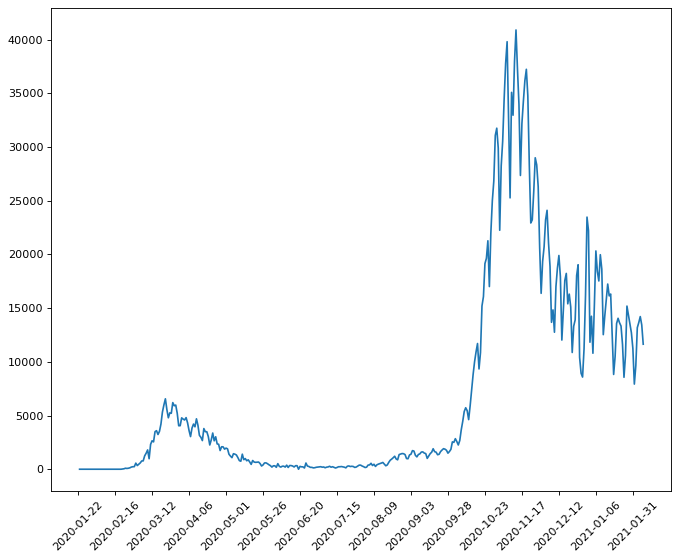

In [8]:
#Plot of one country
country = "Italy"

country = df.loc[df["Country"] == country]
new_confirmed = country["New Confirmed"]
dates = country["Date"]

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot = plt.plot(dates, new_confirmed)

#Edit x axis label frequency and rotation
plt.xticks(np.arange(0, len(dates)+1, 25), rotation=45)
plt.show()

In [9]:
#Plot of one country new confirmed as function
def newConfirmedPlotting(df, country, figsize=(10,8), xstep=25):
    country = df.loc[df["Country"] == country]
    new_confirmed = country["New Confirmed"]
    dates = country["Date"]

    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    plot = plt.plot(dates, new_confirmed)

    #Edit x axis label frequency and rotation
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    plt.show()

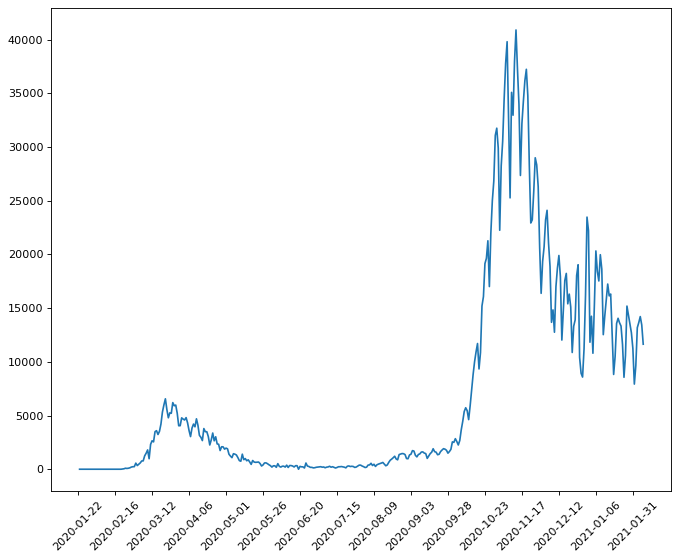

In [13]:
newConfirmedPlotting(df,"Italy")

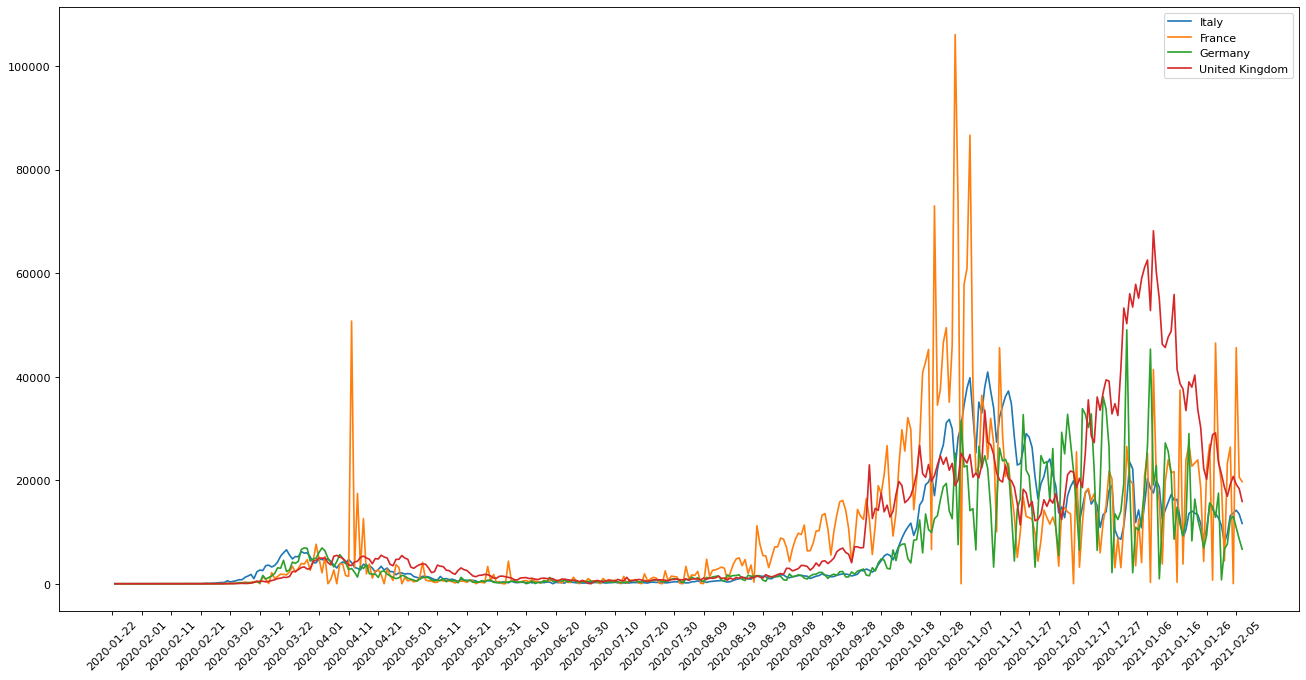

In [14]:
#Plot of 4 countries

countries = ["Italy", "France", "Germany", "United Kingdom"]
#colours = ["red", "blue", "orange", "green"]
countries_new_confirmed = []
dates = df.loc[df["Country"] == "Italy"]["Date"]

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(np.arange(0, len(dates)+1, 10), rotation=45)

for country in countries:
    plt.plot(dates, df.loc[df["Country"] == country]["New Confirmed"], label=country)
    
plt.legend()
plt.show()

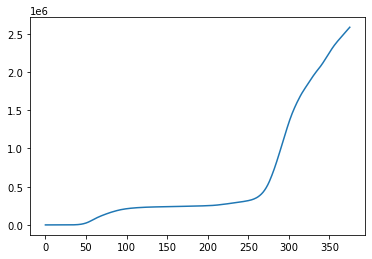

In [16]:
#Rolling Average SMA

confirmed = df.loc[df["Country"] == "Italy"]["Confirmed"]
size = 7
rolling_average = []

#Get first 10
sum = confirmed.iloc[0:size].sum()
rolling_average.append(sum/size)

for x in range(1, len(confirmed)-size):
    sum -=  confirmed.iloc[x-1]
    sum += confirmed.iloc[x+size-1]
    rolling_average.append(sum/size)

plt.plot(rolling_average)
plt.show()

In [81]:
#Rolling Average as function
def rollingAverage(df, field, country, sizes=[7, 14, 21, 28], figsize=(10, 8), xstep=28):
    #check field is valid
    #TODO divide cases or just valid and not valid(?)
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        #print("Field exists but you can plot only on Confirmed or New Confirmed")
        print("Invalid field")
        return -1
    
    country_data = df.loc[df["Country"] == country]
    cases = country_data[field]
    dates = country_data["Date"]
    
    rolling_average = []
    
    for size in sizes:
        """
        avg = []
        for x in range(0, len(cases)-size):
            mean = cases.iloc[x:x+size].mean() #Use mean
            avg.append(mean)
        rolling_average.append([avg, size])
        """
        avg = cases.rolling(window=size).mean()
        rolling_average.append([avg, size])
        #plt.plot(avg) #just plot without other for
        
    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    plt.title("%s %s rolling average" % (country, field))
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    for element, size in rolling_average:
        plt.plot(dates, element, label="Windows size %d" % size)
    
    plt.legend()
    plt.show()

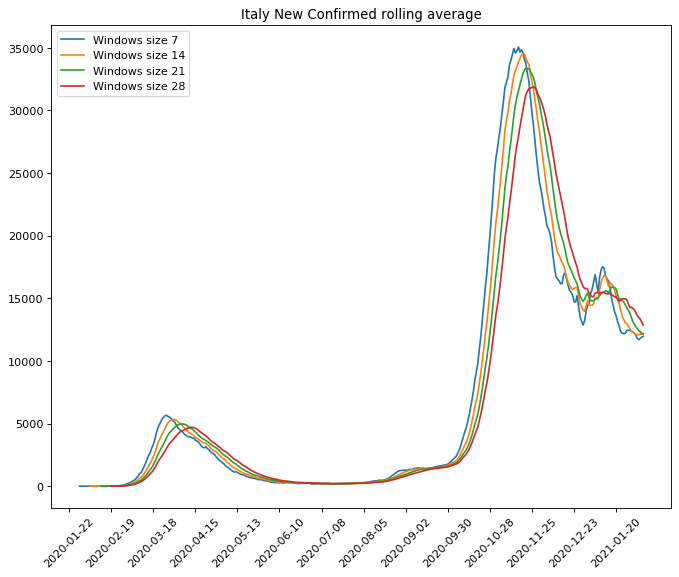

In [85]:
#rollingAverage(df, "New Confirmed", "Italy", [28])
rollingAverage(df, "New Confirmed", "Italy", [7, 14, 21, 28])

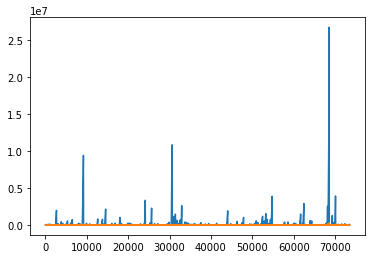

In [32]:
cases = df.loc[df["Country"] == "Italy"]["New Confirmed"]
size = 7

ret = df.iloc[1:].rolling(window=size).mean()
plt.plot(ret)
plt.show()

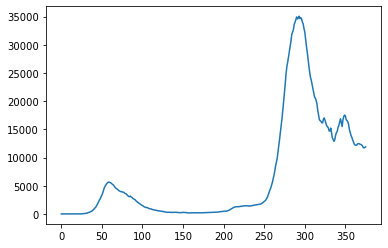

In [9]:
#Rolling Average SMA v2

cases = df.loc[df["Country"] == "Italy"]["New Confirmed"]
size = 7
rolling_average = []

for x in range(0, len(cases)-size):
    sum = cases.iloc[x:x+size].sum() #Sum removes NaN
    rolling_average.append(sum/size)

#print(rolling_average)
plt.plot(rolling_average)
plt.show()

In [23]:
#Moving average global data
def globalData(df, field, sizes=[30], figsize=(12, 10), xstep=30):
    #check field is valid
    #TODO divide cases or just valid and not valid(?)
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Field exists but you can plot only on Confirmed or New Confirmed")
        return -1
    
    #all dates
    days = df["Date"].unique()
    
    #global data
    global_cases = []

    for day in days:
        cases = df.loc[df["Date"] == day][field].sum()
        global_cases.append(cases)
    
    #moving average
    #avg = cases.rolling(window=size).mean()
    
    #size = 30
    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    
    for size in sizes:
        avg = []
        for x in range(0, len(days)-size):
            mean = np.mean(global_cases[x:x+size])
            avg.append(mean)
        
        plt.plot(avg, label="Window size %d" % size)
        
    plt.title("Global %s rolling average" % field)
    #plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    plt.legend()
    plt.show()
    

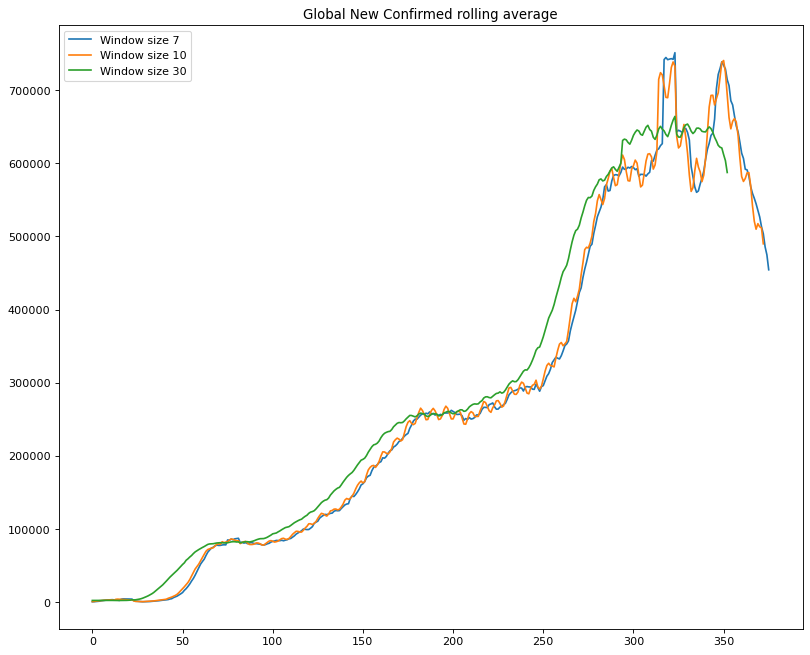

In [26]:
globalData(df, "New Confirmed", [7, 10, 30])

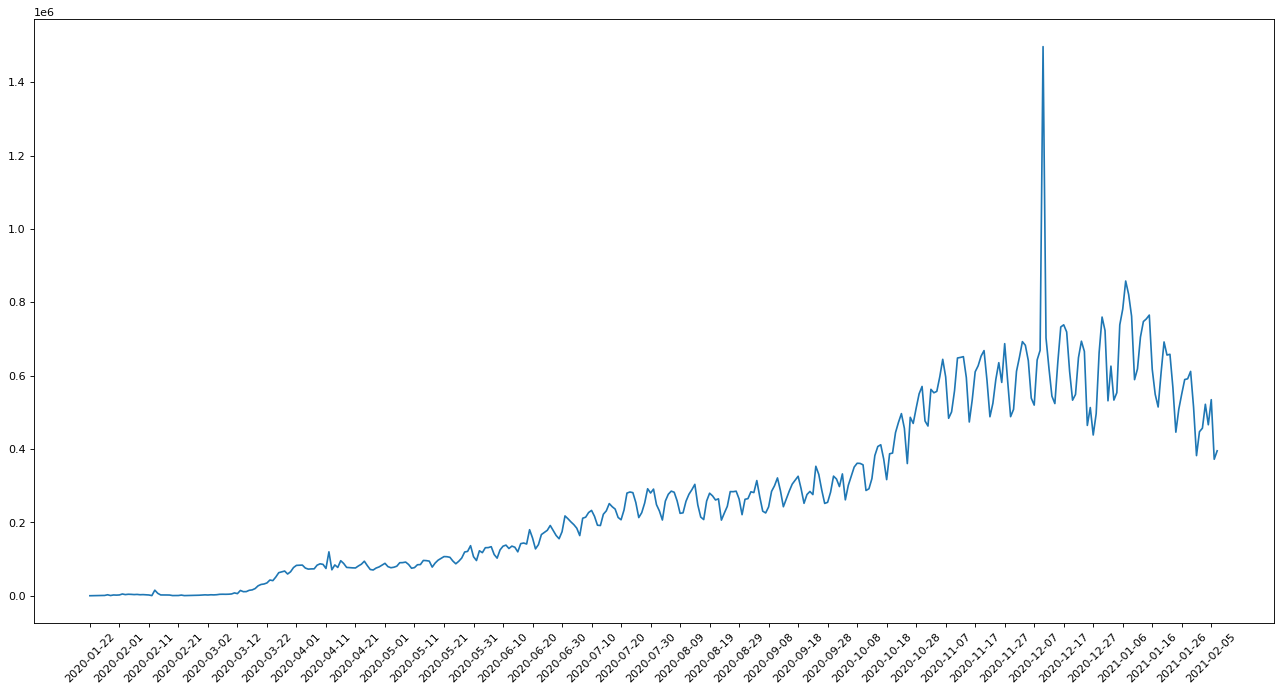

In [40]:
#Global data
days = df["Date"].unique()
global_cases = []

for day in days:
    cases = df.loc[df["Date"] == day]["New Confirmed"].sum()
    global_cases.append(cases)

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(np.arange(0, len(dates)+1, 10), rotation=45)
plt.plot(days, global_cases)
plt.show()

In [28]:
df.loc[df["New Confirmed"].argmax()]

Country              Turkey
Date             2020-12-10
Confirmed           1748567
New Confirmed        823225
Name: 68114, dtype: object

264             Afghanistan
647                 Albania
1030                Algeria
1413                Andorra
1796                 Angola
                ...        
71885               Vietnam
72268    West Bank and Gaza
72651                 Yemen
73034                Zambia
73417              Zimbabwe
Name: Country, Length: 192, dtype: object []


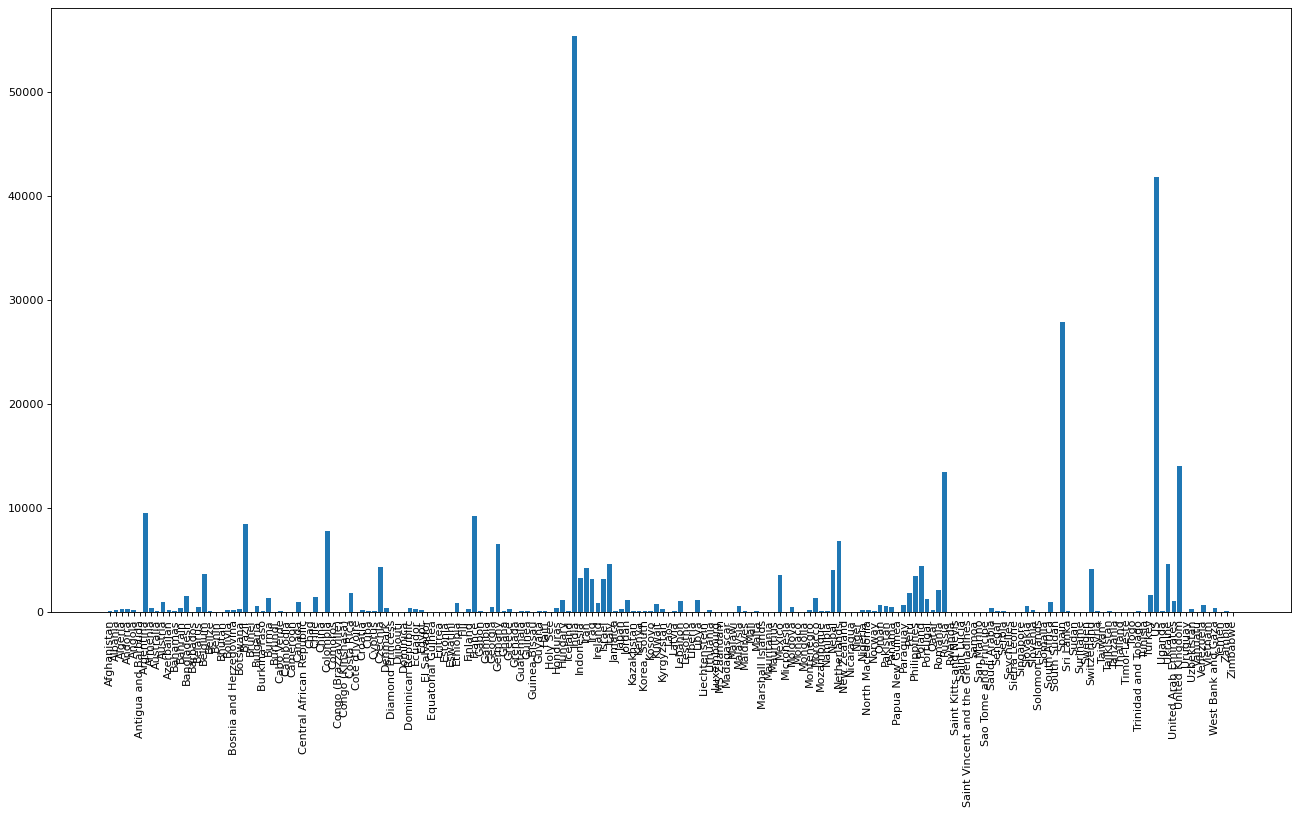

In [43]:
#Bar graph for global cases in a single date
#colours = ["red", "blue", "orange", "green"]
date = "2020-10-12"

df_filtered = df.loc[df["Date"] == date]
countries = df_filtered["Country"]
cases = []
print(countries, cases)

    
fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')


plt.xticks(rotation=90)
plt.bar(df_filtered["Country"], df_filtered["New Confirmed"])
plt.show()